In [1]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('recipes.csv')

# Display the first few rows of the dataframe

C:\Users\91705\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

In [3]:
# Dropping the specified columns
columns_to_delete = [
    "PrepTime", 
    "Images",
    "TotalTime", 
    "DatePublished", 
    "AggregatedRating", 
    "ReviewCount", 
    "RecipeServings", 
    "RecipeYield",
    "AuthorId",
    "AuthorName",
    "RecipeIngredientQuantities",
    "SaturatedFatContent"
]

df = df.drop(columns=columns_to_delete)

# Verifying the updated dataframe structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               522517 non-null  int64  
 1   Name                   522517 non-null  object 
 2   CookTime               439972 non-null  object 
 3   Description            522512 non-null  object 
 4   RecipeCategory         521766 non-null  object 
 5   Keywords               505280 non-null  object 
 6   RecipeIngredientParts  522517 non-null  object 
 7   Calories               522517 non-null  float64
 8   FatContent             522517 non-null  float64
 9   CholesterolContent     522517 non-null  float64
 10  SodiumContent          522517 non-null  float64
 11  CarbohydrateContent    522517 non-null  float64
 12  FiberContent           522517 non-null  float64
 13  SugarContent           522517 non-null  float64
 14  ProteinContent         522517 non-nu

In [4]:
# Drop rows where the 'Keywords' column is NaN
df = df.dropna(subset=['Keywords'])

# Display the updated DataFrame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 505280 entries, 0 to 522516
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               505280 non-null  int64  
 1   Name                   505280 non-null  object 
 2   CookTime               424554 non-null  object 
 3   Description            505275 non-null  object 
 4   RecipeCategory         505280 non-null  object 
 5   Keywords               505280 non-null  object 
 6   RecipeIngredientParts  505280 non-null  object 
 7   Calories               505280 non-null  float64
 8   FatContent             505280 non-null  float64
 9   CholesterolContent     505280 non-null  float64
 10  SodiumContent          505280 non-null  float64
 11  CarbohydrateContent    505280 non-null  float64
 12  FiberContent           505280 non-null  float64
 13  SugarContent           505280 non-null  float64
 14  ProteinContent         505280 non-null  f

            Calories     FatContent  CholesterolContent  SodiumContent  \
count  505280.000000  505280.000000       505280.000000   5.052800e+05   
mean      483.642825      24.515960           86.056008   7.582061e+02   
std      1415.200778     113.055176          305.968434   4.166126e+03   
min         0.000000       0.000000            0.000000   0.000000e+00   
25%       172.700000       5.500000            3.600000   1.205000e+02   
50%       315.100000      13.600000           41.700000   3.471000e+02   
75%       526.800000      27.300000          106.900000   7.835000e+02   
max    612854.600000   64368.100000       130456.400000   1.246921e+06   

       CarbohydrateContent   FiberContent   SugarContent  ProteinContent  
count        505280.000000  505280.000000  505280.000000   505280.000000  
mean             49.296028       3.823598      22.139925       17.302242  
std             183.212106       8.653735     144.549977       40.481450  
min               0.000000       

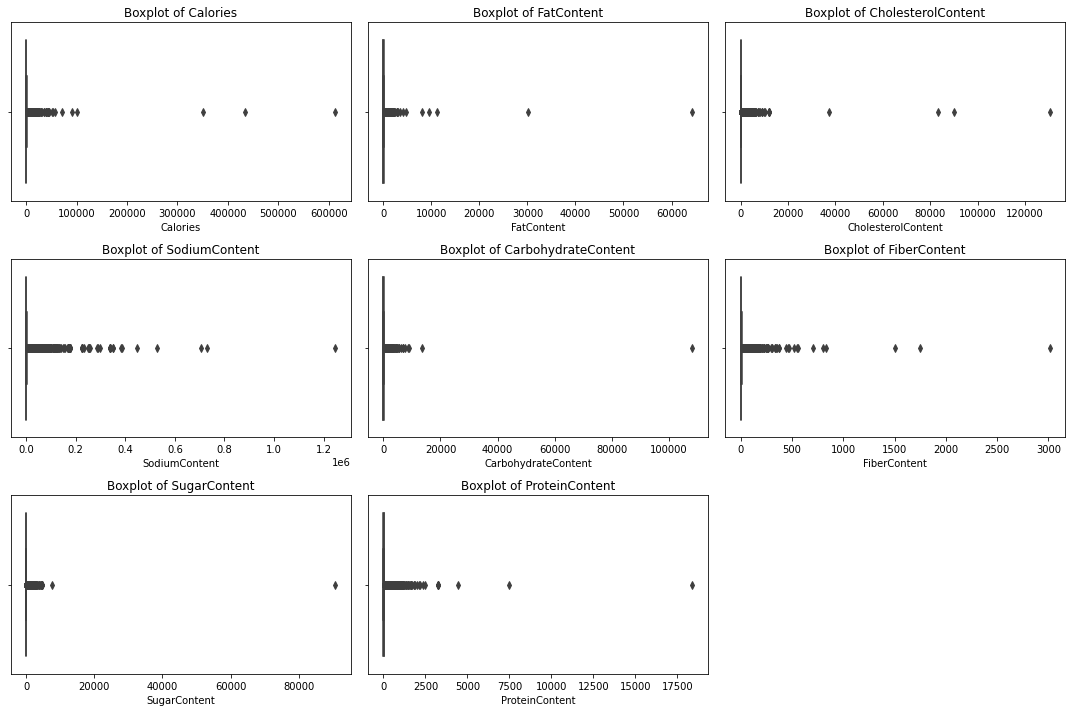

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
columns_of_interest = [
    'Calories', 'FatContent', 
    'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 
    'FiberContent', 'SugarContent', 'ProteinContent'
]

# Calculate statistical details
stats = df[columns_of_interest].describe(percentiles=[.25, .5, .75])

# Display the statistics
print(stats)

# Create boxplots for each column to visualize distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

            Calories     FatContent  CholesterolContent  SodiumContent  \
count  327486.000000  327486.000000       327486.000000  327486.000000   
mean      247.339811      12.391666           43.849744     354.414067   
std       155.040714      10.672981           48.626786     340.035716   
min         0.000000       0.000000            0.000000       0.000000   
25%       127.400000       4.100000            1.200000      84.200000   
50%       222.500000       9.700000           27.100000     244.400000   
75%       343.600000      18.100000           71.600000     537.400000   
max      1054.300000      51.800000          220.200000    1468.700000   

       CarbohydrateContent   FiberContent   SugarContent  ProteinContent  
count        327486.000000  327486.000000  327486.000000   327486.000000  
mean             23.967207       2.164399       8.182225       10.058603  
std              17.798243       1.933437       8.482602       10.247185  
min               0.000000       

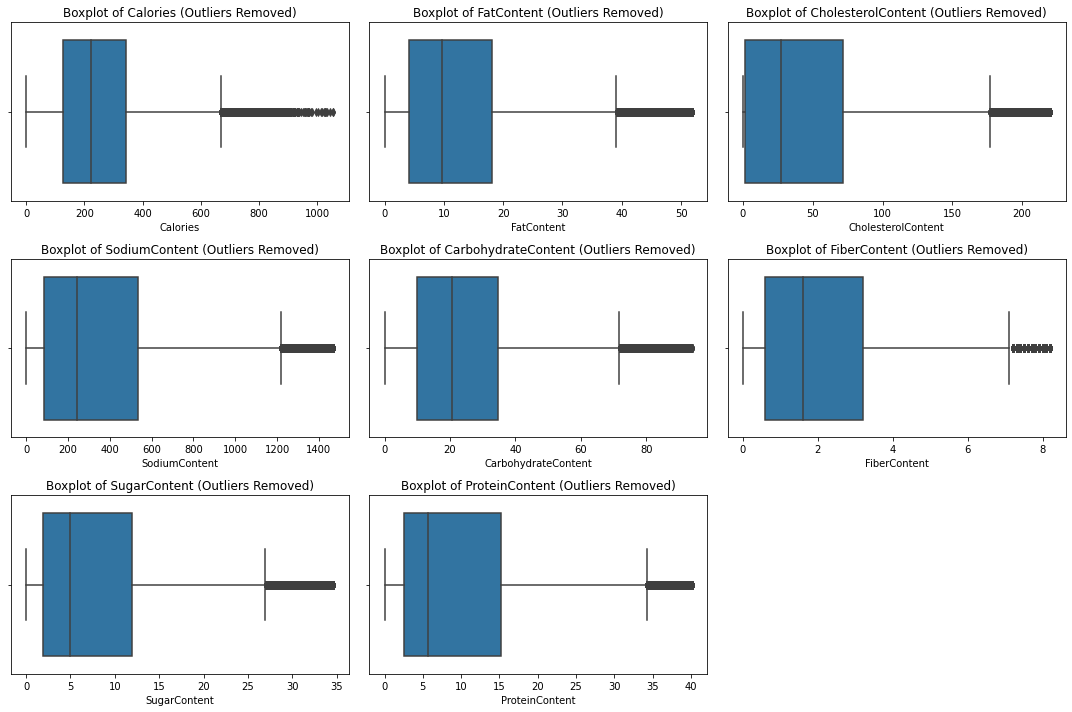

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define columns to check
columns_of_interest = [
    'Calories', 'FatContent', 
    'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 
    'FiberContent', 'SugarContent', 'ProteinContent'
]

# Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the dataset
df_no_outliers = remove_outliers(df, columns_of_interest)

# Calculate the new statistics after removing outliers
stats_no_outliers = df_no_outliers[columns_of_interest].describe(percentiles=[.25, .5, .75])

# Display the new statistics
print(stats_no_outliers)

# Create boxplots for each column after removing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
plt.tight_layout()
plt.show()


In [7]:
invalid_cook_times = df[~df['CookTime'].str.startswith('PT', na=False)]
print(invalid_cook_times['CookTime'].unique())

[nan]


In [8]:
# Drop rows with invalid CookTime values
df = df[df['CookTime'].str.startswith('PT', na=False)]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424554 entries, 0 to 522516
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               424554 non-null  int64  
 1   Name                   424554 non-null  object 
 2   CookTime               424554 non-null  object 
 3   Description            424554 non-null  object 
 4   RecipeCategory         424554 non-null  object 
 5   Keywords               424554 non-null  object 
 6   RecipeIngredientParts  424554 non-null  object 
 7   Calories               424554 non-null  float64
 8   FatContent             424554 non-null  float64
 9   CholesterolContent     424554 non-null  float64
 10  SodiumContent          424554 non-null  float64
 11  CarbohydrateContent    424554 non-null  float64
 12  FiberContent           424554 non-null  float64
 13  SugarContent           424554 non-null  float64
 14  ProteinContent         424554 non-null  f

In [10]:
# Define the columns to process
columns_of_interest = [
    'Calories', 'FatContent', 'CholesterolContent', 
    'SodiumContent', 'CarbohydrateContent', 'FiberContent', 
    'SugarContent', 'ProteinContent'
]

# Function to categorize content level
def categorize_level(value, Q1, Q2, Q3):
    # Apply conditions based on quartiles
    if value <= Q1:
        return 1  # Very low
    elif value <= Q2:
        return 2  # Low
    elif value <= Q3:
        return 3  # Medium
    else:
        return 4  # High

# Calculate the quartiles for each column of interest
quartiles = {}
for col in columns_of_interest:
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.50)
    Q3 = df[col].quantile(0.75)
    quartiles[col] = (Q1, Q2, Q3)

# Apply the categorization to each column and create new columns
for col in columns_of_interest:
    Q1, Q2, Q3 = quartiles[col]
    df[f'{col}_Level'] = df[col].apply(categorize_level, args=(Q1, Q2, Q3))

# Show a sample of the new columns
df[['Calories', 'Calories_Level', 'FatContent', 'FatContent_Level']].head()


,Calories,Calories_Level,FatContent,FatContent_Level
0,170.9,1,2.5,1
1,1110.7,4,58.8,4
2,311.1,2,0.2,1
3,536.1,3,24.0,3
4,103.6,1,0.4,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424554 entries, 0 to 522516
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RecipeId                   424554 non-null  int64  
 1   Name                       424554 non-null  object 
 2   CookTime                   424554 non-null  object 
 3   Description                424554 non-null  object 
 4   RecipeCategory             424554 non-null  object 
 5   Keywords                   424554 non-null  object 
 6   RecipeIngredientParts      424554 non-null  object 
 7   Calories                   424554 non-null  float64
 8   FatContent                 424554 non-null  float64
 9   CholesterolContent         424554 non-null  float64
 10  SodiumContent              424554 non-null  float64
 11  CarbohydrateContent        424554 non-null  float64
 12  FiberContent               424554 non-null  float64
 13  SugarContent               424554 

In [12]:
# Dropping the specified columns
columns_to_delete = [
    "Calories", 
    "FatContent", 
    "CholesterolContent", 
    "CarbohydrateContent", 
    "FiberContent", 
    "SugarContent", 
    "ProteinContent"
]

df = df.drop(columns=columns_to_delete)

# Verifying the updated dataframe structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 424554 entries, 0 to 522516
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RecipeId                   424554 non-null  int64  
 1   Name                       424554 non-null  object 
 2   CookTime                   424554 non-null  object 
 3   Description                424554 non-null  object 
 4   RecipeCategory             424554 non-null  object 
 5   Keywords                   424554 non-null  object 
 6   RecipeIngredientParts      424554 non-null  object 
 7   SodiumContent              424554 non-null  float64
 8   RecipeInstructions         424554 non-null  object 
 9   Calories_Level             424554 non-null  int64  
 10  FatContent_Level           424554 non-null  int64  
 11  CholesterolContent_Level   424554 non-null  int64  
 12  SodiumContent_Level        424554 non-null  int64  
 13  CarbohydrateContent_Level  424554 

In [13]:
import pandas as pd

# Sample data loading (replace this with your actual DataFrame)
# df = pd.read_csv("your_dataset.csv") 

# Define the mapping of numbers to labels
value_mapping = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}

# List of columns to transform
columns_to_replace = [
    "Calories_Level",
    "FatContent_Level",
    "CholesterolContent_Level",
    "SodiumContent_Level",
    "CarbohydrateContent_Level",
    "FiberContent_Level",
    "SugarContent_Level",
    "ProteinContent_Level"
]

# Replace numerical values with labels
for column in columns_to_replace:
    df[column] = df[column].replace(value_mapping)

# Display the updated DataFrame
print(df.head())

   RecipeId                               Name CookTime  \
0        38  Low-Fat Berry Blue Frozen Dessert    PT24H   
1        39                            Biryani    PT25M   
2        40                      Best Lemonade     PT5M   
3        41     Carina's Tofu-Vegetable Kebabs    PT20M   
4        42                       Cabbage Soup    PT30M   

                                         Description   RecipeCategory  \
0  Make and share this Low-Fat Berry Blue Frozen ...  Frozen Desserts   
1  Make and share this Biryani recipe from Food.com.   Chicken Breast   
2  This is from one of my  first Good House Keepi...        Beverages   
3  This dish is best prepared a day in advance to...         Soy/Tofu   
4  Make and share this Cabbage Soup recipe from F...        Vegetable   

                                            Keywords  \
0  c("Dessert", "Low Protein", "Low Cholesterol",...   
1  c("Chicken Thigh & Leg", "Chicken", "Poultry",...   
2  c("Low Protein", "Low Cholesterol",

In [14]:
import pandas as pd
import re

# Mappings for different content levels
content_mappings = {
    "Calories_Level": {
        "Low": "Low calories",
        "Medium": "Medium calories",
        "High": "High calories",
        "Very High": "Very High calories"
    },
    "FatContent_Level": {
        "Low": "Low Fat",
        "Medium": "Medium Fat",
        "High": "High Fat",
        "Very High": "Very High Fat"
    },
    "CholesterolContent_Level": {
        "Low": "Low Cholesterol",
        "Medium": "Medium Cholesterol",
        "High": "High Cholesterol",
        "Very High": "Very High Cholesterol"
    },
    "SodiumContent_Level": {
        "Low": "Low Sodium",
        "Medium": "Medium Sodium",
        "High": "High Sodium",
        "Very High": "Very High Sodium"
    },
    "CarbohydrateContent_Level": {
        "Low": "Low Carbohydrates",
        "Medium": "Medium Carbohydrates",
        "High": "High Carbohydrates",
        "Very High": "Very High Carbohydrates"
    },
    "FiberContent_Level": {
        "Low": "Low Fiber",
        "Medium": "Medium Fiber",
        "High": "High Fiber",
        "Very High": "Very High Fiber"
    },
    "SugarContent_Level": {
        "Low": "Low Sugar",
        "Medium": "Medium Sugar",
        "High": "High Sugar",
        "Very High": "Very High Sugar"
    },
    "ProteinContent_Level": {
        "Low": "Low Protein",
        "Medium": "Medium Protein",
        "High": "High Protein",
        "Very High": "Very High Protein"
    }
}

# Generalized function to update keywords

def update_keywords(row):
    try:
        # Flatten any nested c(...) structure using regex
        flattened = re.sub(r'c\((.*?)\)', r'\1', row["Keywords"])

        # Convert to a list and clean stray quotes
        keywords_list = [kw.strip('"') for kw in flattened.split(", ")]

        # Iterate over all content level columns and their mappings
        for column, mapping in content_mappings.items():
            content_keyword = mapping.get(row[column], None)
            if content_keyword:
                # Remove existing instances to avoid duplicates
                if content_keyword in keywords_list:
                    keywords_list.remove(content_keyword)
                # Insert at the zero index
                keywords_list.insert(0, content_keyword)

        # Reconstruct the set-like format
        updated_keywords = 'c(' + ', '.join(f'"{kw}"' for kw in keywords_list) + ')'
        return updated_keywords

    except Exception as e:
        print(f"Error processing row: {e}")
        return row["Keywords"]  # Return original if any error occurs

# Apply the function to update Keywords
df["Keywords"] = df.apply(update_keywords, axis=1)

# View the updated dataset
print(df.head())

   RecipeId                               Name CookTime  \
0        38  Low-Fat Berry Blue Frozen Dessert    PT24H   
1        39                            Biryani    PT25M   
2        40                      Best Lemonade     PT5M   
3        41     Carina's Tofu-Vegetable Kebabs    PT20M   
4        42                       Cabbage Soup    PT30M   

                                         Description   RecipeCategory  \
0  Make and share this Low-Fat Berry Blue Frozen ...  Frozen Desserts   
1  Make and share this Biryani recipe from Food.com.   Chicken Breast   
2  This is from one of my  first Good House Keepi...        Beverages   
3  This dish is best prepared a day in advance to...         Soy/Tofu   
4  Make and share this Cabbage Soup recipe from F...        Vegetable   

                                            Keywords  \
0  c("Low Protein", "Very High Sugar", "High Fibe...   
1  c("Very High Protein", "Very High Sugar", "Ver...   
2  c("Low Protein", "Very High Sugar",

In [15]:
# Save the updated dataset
df.to_csv("updated_recipes_dataset_M3.csv", index=False, encoding="utf-8")

print("Dataset saved successfully as 'updated_recipes_dataset_M3.csv'")


Dataset saved successfully as 'updated_recipes_dataset_M3.csv'


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424554 entries, 0 to 522516
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RecipeId                   424554 non-null  int64  
 1   Name                       424554 non-null  object 
 2   CookTime                   424554 non-null  object 
 3   Description                424554 non-null  object 
 4   RecipeCategory             424554 non-null  object 
 5   Keywords                   424554 non-null  object 
 6   RecipeIngredientParts      424554 non-null  object 
 7   SodiumContent              424554 non-null  float64
 8   RecipeInstructions         424554 non-null  object 
 9   Calories_Level             424554 non-null  object 
 10  FatContent_Level           424554 non-null  object 
 11  CholesterolContent_Level   424554 non-null  object 
 12  SodiumContent_Level        424554 non-null  object 
 13  CarbohydrateContent_Level  424554 

In [17]:
df.head()

,RecipeId,Name,CookTime,Description,RecipeCategory,Keywords,RecipeIngredientParts,SodiumContent,RecipeInstructions,Calories_Level,FatContent_Level,CholesterolContent_Level,SodiumContent_Level,CarbohydrateContent_Level,FiberContent_Level,SugarContent_Level,ProteinContent_Level
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"c(""Low Protein"", ""Very High Sugar"", ""High Fibe...","c(""blueberries"", ""granulated sugar"", ""vanilla ...",29.8,"c(""Toss 2 cups berries with sugar."", ""Let stan...",Low,Low,Low,Low,High,High,Very High,Low
1,39,Biryani,PT25M,Make and share this Biryani recipe from Food.com.,Chicken Breast,"c(""Very High Protein"", ""Very High Sugar"", ""Ver...","c(""saffron"", ""milk"", ""hot green chili peppers""...",368.4,"c(""Soak saffron in warm milk for 5 minutes and...",Very High,Very High,Very High,Medium,Very High,Very High,Very High,Very High
2,40,Best Lemonade,PT5M,This is from one of my first Good House Keepi...,Beverages,"c(""Low Protein"", ""Very High Sugar"", ""Low Fiber...","c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",1.8,"c(""Into a 1 quart Jar with tight fitting lid, ...",Medium,Low,Low,Low,Very High,Low,Very High,Low
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,This dish is best prepared a day in advance to...,Soy/Tofu,"c(""Very High Protein"", ""Very High Sugar"", ""Ver...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",1558.6,"c(""Drain the tofu, carefully squeezing out exc...",High,High,Low,Very High,Very High,Very High,Very High,Very High
4,42,Cabbage Soup,PT30M,Make and share this Cabbage Soup recipe from F...,Vegetable,"c(""Medium Protein"", ""High Sugar"", ""Very High F...","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",959.3,"c(""Mix everything together and bring to a boil...",Low,Low,Low,Very High,Medium,Very High,High,Medium


In [18]:
print(df.columns)

Index(['RecipeId', 'Name', 'CookTime', 'Description', 'RecipeCategory',
       'Keywords', 'RecipeIngredientParts', 'SodiumContent',
       'RecipeInstructions', 'Calories_Level', 'FatContent_Level',
       'CholesterolContent_Level', 'SodiumContent_Level',
       'CarbohydrateContent_Level', 'FiberContent_Level', 'SugarContent_Level',
       'ProteinContent_Level'],
      dtype='object')


In [33]:
pip install streamlit pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\

In [34]:
streamlit run streamlit_app.py


SyntaxError: invalid syntax (<ipython-input-34-5124338ac38b>, line 1)

In [23]:
print(df.columns)


Index(['RecipeId', 'Name', 'CookTime', 'Description', 'RecipeCategory',
       'Keywords', 'RecipeIngredientParts', 'SodiumContent',
       'RecipeInstructions', 'Calories_Level', 'FatContent_Level',
       'CholesterolContent_Level', 'SodiumContent_Level',
       'CarbohydrateContent_Level', 'FiberContent_Level', 'SugarContent_Level',
       'ProteinContent_Level'],
      dtype='object')


In [25]:
df.head(5)

,RecipeId,Name,CookTime,Description,RecipeCategory,Keywords,RecipeIngredientParts,SodiumContent,RecipeInstructions,Calories_Level,FatContent_Level,CholesterolContent_Level,SodiumContent_Level,CarbohydrateContent_Level,FiberContent_Level,SugarContent_Level,ProteinContent_Level
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"c(""Low Protein"", ""Very High Sugar"", ""High Fibe...","c(""blueberries"", ""granulated sugar"", ""vanilla ...",29.8,"c(""Toss 2 cups berries with sugar."", ""Let stan...",Low,Low,Low,Low,High,High,Very High,Low
1,39,Biryani,PT25M,Make and share this Biryani recipe from Food.com.,Chicken Breast,"c(""Very High Protein"", ""Very High Sugar"", ""Ver...","c(""saffron"", ""milk"", ""hot green chili peppers""...",368.4,"c(""Soak saffron in warm milk for 5 minutes and...",Very High,Very High,Very High,Medium,Very High,Very High,Very High,Very High
2,40,Best Lemonade,PT5M,This is from one of my first Good House Keepi...,Beverages,"c(""Low Protein"", ""Very High Sugar"", ""Low Fiber...","c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",1.8,"c(""Into a 1 quart Jar with tight fitting lid, ...",Medium,Low,Low,Low,Very High,Low,Very High,Low
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,This dish is best prepared a day in advance to...,Soy/Tofu,"c(""Very High Protein"", ""Very High Sugar"", ""Ver...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",1558.6,"c(""Drain the tofu, carefully squeezing out exc...",High,High,Low,Very High,Very High,Very High,Very High,Very High
4,42,Cabbage Soup,PT30M,Make and share this Cabbage Soup recipe from F...,Vegetable,"c(""Medium Protein"", ""High Sugar"", ""Very High F...","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",959.3,"c(""Mix everything together and bring to a boil...",Low,Low,Low,Very High,Medium,Very High,High,Medium


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424554 entries, 0 to 522516
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RecipeId                   424554 non-null  int64  
 1   Name                       424554 non-null  object 
 2   CookTime                   424554 non-null  object 
 3   Description                424554 non-null  object 
 4   RecipeCategory             424554 non-null  object 
 5   Keywords                   424554 non-null  object 
 6   RecipeIngredientParts      424554 non-null  object 
 7   SodiumContent              424554 non-null  float64
 8   RecipeInstructions         424554 non-null  object 
 9   Calories_Level             424554 non-null  object 
 10  FatContent_Level           424554 non-null  object 
 11  CholesterolContent_Level   424554 non-null  object 
 12  SodiumContent_Level        424554 non-null  object 
 13  CarbohydrateContent_Level  424554 


=== Nutrient: Calories_Level ===


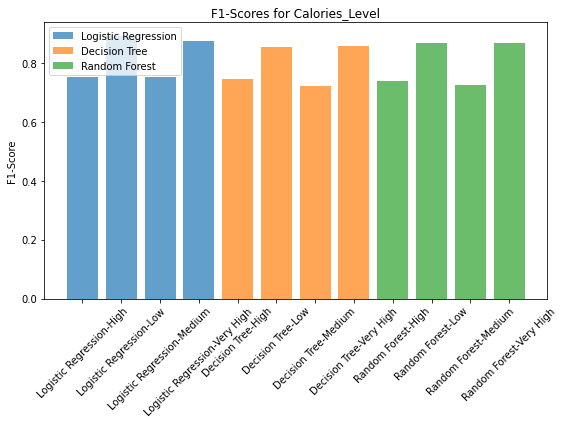


=== Nutrient: FatContent_Level ===


KeyboardInterrupt: 

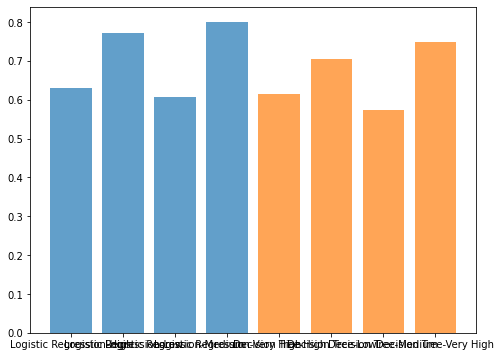

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load dataset (assuming it's uploaded again)
# file_path = "/mnt/data/cleaned_recipes_dataset.csv"
# df = pd.read_csv(file_path)

# Sample smaller dataset for faster processing
df_sample = df.sample(n=5000, random_state=42)

# Nutrient levels to predict
nutrient_levels = [
    "Calories_Level",
    "FatContent_Level",
    "CholesterolContent_Level",
    "SodiumContent_Level",
    "CarbohydrateContent_Level",
    "FiberContent_Level",
    "SugarContent_Level",
    "ProteinContent_Level"
]

# TF-IDF Vectorization of keywords
vectorizer = TfidfVectorizer(max_features=500)  # Reduced features for faster training
X = vectorizer.fit_transform(df_sample["Keywords"].astype(str))

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
}

# Store overall results
all_results = {}

# Loop through each nutrient level
for nutrient in nutrient_levels:
    print(f"\n=== Nutrient: {nutrient} ===")
    y = df_sample[nutrient]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    nutrient_results = {}
    
    plt.figure(figsize=(8, 6))
    
    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Store results
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        acc = accuracy_score(y_test, y_pred)
        
        nutrient_results[name] = {
            "accuracy": acc,
            "report": report
        }
        
        # Bar plot for F1-score per class
        f1_scores = [report[str(label)]["f1-score"] for label in sorted(set(y_test))]
        plt.bar([f"{name}-{label}" for label in sorted(set(y_test))], f1_scores, alpha=0.7, label=name)
    
    all_results[nutrient] = nutrient_results
    
    # Plot formatting
    plt.title(f"F1-Scores for {nutrient}")
    plt.ylabel("F1-Score")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Convert overall accuracy results to DataFrame for display
summary_data = []

for nutrient, results in all_results.items():
    for model_name, metrics in results.items():
        summary_data.append({
            "Nutrient": nutrient,
            "Model": model_name,
            "Accuracy": metrics["accuracy"]
        })

summary_df = pd.DataFrame(summary_data)

from IPython.display import display
display(summary_df)



In [ ]:
# Write Streamlit code to app.py with UTF-8 encoding
with open("app.py", "w", encoding="utf-8") as file:
    file.write(streamlit_code)
